# This Notebook is designed to look at the Titanic Survival Data using SparkML
## First Connect to Koverse

In [1]:
from koverse import client
client.connect()

## List Datasets 

In [2]:
import pandas as pd
myDatasets = [ {'name':x.name,'id':x.id,'recordCount':x.recordCount} for x in client.listDatasets()]
pDatasets = pd.DataFrame(list(myDatasets))
#pDatasets[pDatasets['name'].str.contains("Titanic")]
pDatasets[0:10]


,name,id,recordCount
0,Synthea Imaging Studies,synthea_imaging_studies_20200518_224502_974,6530
1,Synthea Immunizations,synthea_immunizations_20200518_224812_002,131919
2,Titanic,titanic_20200511_190511_437,891
3,employees,employees_20200415_141342_249,1007
4,TitanicSparkML,titanicsparkml_20200514_145006_279,891
5,Synthea Organizations,synthea_organizations_20200518_204638_543,13715
6,Synthea Encounters,synthea_encounters_20200514_020629_175,432166
7,CME Crosswalk Test No Dates,cme_crosswalk_test_no_dates_20200113_214056_920,3
8,LexisNexis Sample,lexisnexis_sample_20190815_025249_062,2500
9,Synthea Care Plans,synthea_care_plans_20200518_224151_124,29160


## Then retreive data into Spark DataFrame

In [2]:
df = client.get_spark_dataframe(spark,data_set_name='Titanic')
df.show(10)

+----+-----+--------+-------+--------------------+-----+------+------+-----+--------+--------+
| age|cabin|embarked|   fare|                name|parch|pclass|   sex|sibsp|survived|  ticket|
+----+-----+--------+-------+--------------------+-----+------+------+-----+--------+--------+
|38.0|  C85|       C|71.2833|Cumings, Mrs. Joh...|  0.0|   1.0|female|  1.0|     1.0|PC 17599|
|35.0| C123|       S|   53.1|Futrelle, Mrs. Ja...|  0.0|   1.0|female|  1.0|     1.0|  113803|
|null| null|       Q| 8.4583|    Moran, Mr. James|  0.0|   3.0|  male|  0.0|     0.0|  330877|
| 2.0| null|       S| 21.075|Palsson, Master. ...|  1.0|   3.0|  male|  3.0|     0.0|  349909|
|14.0| null|       C|30.0708|Nasser, Mrs. Nich...|  0.0|   2.0|female|  1.0|     1.0|  237736|
|58.0| C103|       S|  26.55|Bonnell, Miss. El...|  0.0|   1.0|female|  0.0|     1.0|  113783|
|39.0| null|       S| 31.275|Andersson, Mr. An...|  5.0|   3.0|  male|  1.0|     0.0|  347082|
|55.0| null|       S|   16.0|Hewlett, Mrs. (Ma...|

## Explore with SQL

In [3]:
df.createOrReplaceTempView("titanicTemp")
result = spark.sql('''
   SELECT sex, AVG(age) as avg_age
   FROM titanicTemp
   GROUP BY sex
   ''')
result.show()


+------+------------------+
|   sex|           avg_age|
+------+------------------+
|female|27.915708812260537|
|  male| 30.72664459161148|
+------+------------------+



## Explore data using dataframe or using Pandas

In [2]:
pDF = client.get_pandas_dataframe(spark,data_set_name='Titanic')
pDF

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket
0,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,1.0,female,1.0,1.0,PC 17599
1,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1.0,female,1.0,1.0,113803
2,NaN,None,Q,8.4583,"Moran, Mr. James",0.0,3.0,male,0.0,0.0,330877
3,2.0,None,S,21.0750,"Palsson, Master. Gosta Leonard",1.0,3.0,male,3.0,0.0,349909
4,14.0,None,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0.0,2.0,female,1.0,1.0,237736
...,...,...,...,...,...,...,...,...,...,...,...
886,22.0,None,S,10.5167,"Dahlberg, Miss. Gerda Ulrika",0.0,3.0,female,0.0,0.0,7552
887,25.0,None,S,7.0500,"Sutehall, Mr. Henry Jr",0.0,3.0,male,0.0,0.0,SOTON/OQ 392076
888,27.0,None,S,13.0000,"Montvila, Rev. Juozas",0.0,2.0,male,0.0,0.0,211536
889,NaN,None,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2.0,3.0,female,1.0,0.0,W./C. 6607


In [17]:
pDF.info(verbose=True)
pDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       714 non-null    float64
 1   cabin     204 non-null    object 
 2   embarked  889 non-null    object 
 3   fare      891 non-null    float64
 4   name      891 non-null    object 
 5   parch     891 non-null    float64
 6   pclass    891 non-null    float64
 7   sex       891 non-null    object 
 8   sibsp     891 non-null    float64
 9   survived  891 non-null    float64
 10  ticket    891 non-null    object 
dtypes: float64(6), object(5)
memory usage: 76.7+ KB


,age,fare,parch,pclass,sibsp,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,3.000000,8.000000,1.000000


INFO:matplotlib.font_manager:generated new fontManager


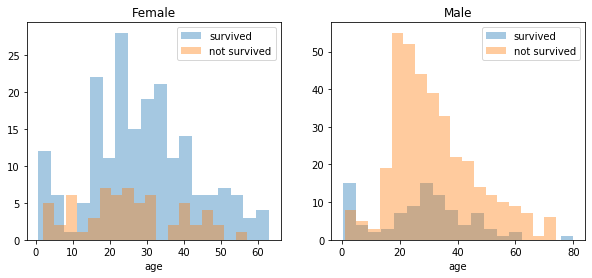

In [18]:
# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
import matplotlib.pyplot as plt
import seaborn as sns
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = pDF[pDF['sex']=='female']
men = pDF[pDF['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=18, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=18, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

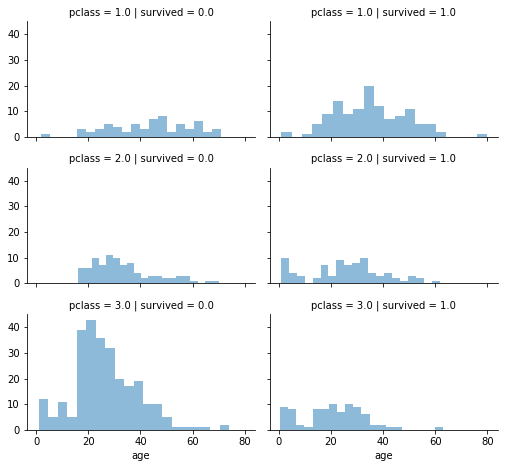

In [19]:
grid = sns.FacetGrid(pDF, col='survived', row='pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

## Create Features to be used in model

In [20]:
import pyspark.sql.functions as F
mean = pDF["age"].mean()
print(mean)

df2 = df.withColumn("male", (F.when(F.col("sex") == 'male', 1).otherwise(0)))
df2 = df2.withColumn("embarked_num", (F.when(F.col("embarked") == 'Q', 1).otherwise(0)))
df2 = df2.withColumn("age_new", (F.when(F.col("age").isNull(), mean).otherwise(F.col("age"))))

29.69911764705882


In [26]:
df2.toPandas()

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket,male,embarked_num,age_new
0,22.0,None,S,7.2500,"Braund, Mr. Owen Harris",0.0,3.0,male,1.0,0.0,A/5 21171,1,0,22.0
1,26.0,None,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,female,0.0,1.0,STON/O2. 3101282,0,0,26.0
2,35.0,None,S,8.0500,"Allen, Mr. William Henry",0.0,3.0,male,0.0,0.0,373450,1,0,35.0
3,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0.0,1.0,male,0.0,0.0,17463,1,0,54.0
4,27.0,None,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2.0,3.0,female,0.0,1.0,347742,0,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,33.0,None,S,7.8958,"Markun, Mr. Johann",0.0,3.0,male,0.0,0.0,349257,1,0,33.0
887,28.0,None,S,10.5000,"Banfield, Mr. Frederick James",0.0,2.0,male,0.0,0.0,C.A./SOTON 34068,1,0,28.0
888,39.0,None,Q,29.1250,"Rice, Mrs. William (Margaret Norton)",5.0,3.0,female,0.0,0.0,382652,0,1,39.0
889,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0.0,1.0,female,0.0,1.0,112053,0,0,19.0


In [27]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer,VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


cols = ['age_new','embarked_num', 'male', 'parch', 'pclass', 'sibsp']


vecassemb = VectorAssembler(inputCols=cols,outputCol='features')
df3 = vecassemb.transform(df2)


df_train, df_test = df3.randomSplit([0.8,0.2])

rf = RandomForestClassifier(featuresCol='features',labelCol='survived')
model = rf.fit(df_train)
result = model.transform(df_test)


predictionAndLabels = result.select("prediction", "survived")

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="survived", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(result)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.230337


In [28]:
all_results = model.transform(df3)
all_results.select('name','survived','prediction').toPandas()

,name,survived,prediction
0,"Braund, Mr. Owen Harris",0.0,0.0
1,"Heikkinen, Miss. Laina",1.0,1.0
2,"Allen, Mr. William Henry",0.0,0.0
3,"McCarthy, Mr. Timothy J",0.0,0.0
4,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,0.0
...,...,...,...
886,"Markun, Mr. Johann",0.0,0.0
887,"Banfield, Mr. Frederick James",0.0,0.0
888,"Rice, Mrs. William (Margaret Norton)",0.0,0.0
889,"Graham, Miss. Margaret Edith",1.0,1.0


Text(0.5, 1.0, 'Feature Importances')

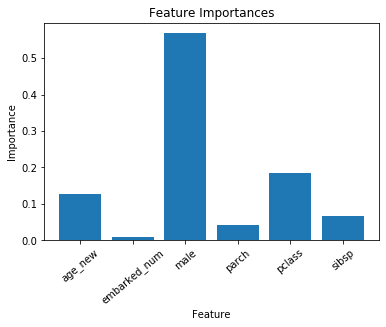

In [29]:
importances = model.featureImportances

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, cols, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

## Save back to Koverse

In [ ]:
client.write_spark_dataframe(spark, all_results, DataSetConfiguration("titanic_out", "overwrite", False))